In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/ai_job_dataset.csv')

In [ ]:
#understanding the data sets
print("Column names:")
print(df.columns)

print("\nDataset info:")
df.info()


print("\nSummary statistics:")
df.describe()

Column names:
Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12141 entries, 0 to 12140
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  12141 non-null  object 
 1   job_title               12141 non-null  object 
 2   salary_usd              12141 non-null  int64  
 3   salary_currency         12141 non-null  object 
 4   experience_level        12141 non-null  object 
 5   employment_type         12141 non-null  object 
 6   company_location        12

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,12141.000000,12141.000000,12140.000000,12140.000000,12140.000000
mean,115533.211103,49.304835,6.297529,1503.283031,7.496829
std,60172.056734,40.857502,5.562053,575.790098,1.450383
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70498.000000,0.000000,2.000000,1004.000000,6.200000
50%,99971.000000,50.000000,5.000000,1512.000000,7.500000
75%,146369.000000,100.000000,10.000000,2001.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [ ]:
# Check if any data is missing
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


In [ ]:
#dropping missing values
df.dropna(inplace=True)


In [ ]:

df = df[['job_title', 'required_skills', 'education_required', 'salary_usd']]


df.dropna(inplace=True)


df.head()


/tmp/ipython-input-8-1956853706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,job_title,required_skills,education_required,salary_usd
0,AI Research Scientist,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,90376
1,AI Software Engineer,"Deep Learning, AWS, Mathematics, Python, Docker",Master,61895
2,AI Specialist,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,152626
3,NLP Engineer,"Scala, SQL, Linux, Python",PhD,80215
4,AI Consultant,"MLOps, Java, Tableau, Python",Master,54624


In [ ]:
#turning words into numbers - LabelEncoding
from sklearn.preprocessing import LabelEncoder


le_job = LabelEncoder()
le_edu = LabelEncoder()


df['job_title_encoded'] = le_job.fit_transform(df['job_title'])
df['education_encoded'] = le_edu.fit_transform(df['education_required'])


df['skill_count'] = df['required_skills'].apply(lambda x: len(x.split(',')))


df[['job_title', 'required_skills', 'education_required', 'job_title_encoded', 'education_encoded', 'skill_count', 'salary_usd']].head()


/tmp/ipython-input-9-1563020763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_title_encoded'] = le_job.fit_transform(df['job_title'])
/tmp/ipython-input-9-1563020763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_encoded'] = le_edu.fit_transform(df['education_required'])
/tmp/ipython-input-9-1563020763.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,job_title,required_skills,education_required,job_title_encoded,education_encoded,skill_count,salary_usd
0,AI Research Scientist,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,3,1,5,90376
1,AI Software Engineer,"Deep Learning, AWS, Mathematics, Python, Docker",Master,4,2,5,61895
2,AI Specialist,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,5,0,5,152626
3,NLP Engineer,"Scala, SQL, Linux, Python",PhD,16,3,4,80215
4,AI Consultant,"MLOps, Java, Tableau, Python",Master,1,2,4,54624


In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df[['job_title_encoded', 'education_encoded', 'skill_count']]
y = df['salary_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


y_pred_lr = model_lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 3648732869.47
R² Score: -0.00


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import joblib


df = pd.read_csv("/content/ai_job_dataset.csv")


df = df.dropna(subset=["salary_usd"])


for col in ["required_skills", "education_required", "years_experience",
            "job_description_length", "benefits_score"]:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median() if df[col].dtype != 'object' else "Unknown")


df["skill_count"] = df["required_skills"].fillna("").apply(
    lambda x: len([s.strip() for s in str(x).split(",") if s.strip()])
)


feature_cols = [
    "job_title",
    "education_required",
    "experience_level",
    "company_size",
    "remote_ratio",
    "years_experience",
    "job_description_length",
    "benefits_score",
    "skill_count"
]
X = df[feature_cols]
y = df["salary_usd"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


cat_cols = ["job_title", "education_required", "experience_level", "company_size"]
num_cols = ["remote_ratio", "years_experience", "job_description_length", "benefits_score", "skill_count"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)


gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    random_state=42
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", gbr)
])

pipe.fit(X_train, y_train)


y_pred = pipe.predict(X_test)
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting MAE : {mae:.2f}")
print(f"Gradient Boosting RMSE: {rmse:.2f}")
print(f"Gradient Boosting R²  : {r2:.3f}")


joblib.dump(pipe, "model_gb.pkl")
print("Saved model_gb.pkl")


Gradient Boosting MAE : 27431.87
Gradient Boosting RMSE: 36735.46
Gradient Boosting R²  : 0.630
Saved model_gb.pkl


Linear Regression -> MSE: 3509825892.79, R²: 0.04
Gradient Boosting -> MSE: 1317923116.51, R²: 0.64


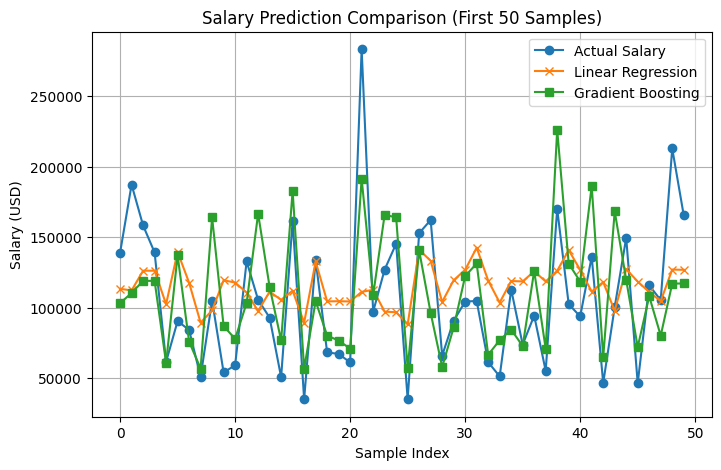

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

-
le_job = LabelEncoder()
le_edu = LabelEncoder()
le_exp = LabelEncoder()
le_size = LabelEncoder()

df['job_title_encoded'] = le_job.fit_transform(df['job_title'])
df['education_encoded'] = le_edu.fit_transform(df['education_required'])
df['experience_encoded'] = le_exp.fit_transform(df['experience_level'])
df['company_size_encoded'] = le_size.fit_transform(df['company_size'])


X = df[['job_title_encoded', 'education_encoded', 'experience_encoded', 'company_size_encoded']]
y = df['salary_usd']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2. Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


# 3. Gradient Boosting

gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


# 4. Metrics

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Linear Regression -> MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Gradient Boosting -> MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")


# 5. Comparison Graph

plt.figure(figsize=(8,5))
plt.plot(y_test.values[:50], label="Actual Salary", marker='o')
plt.plot(y_pred_lr[:50], label="Linear Regression", marker='x')
plt.plot(y_pred_gb[:50], label="Gradient Boosting", marker='s')
plt.title("Salary Prediction Comparison (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Salary (USD)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import joblib

# Save Linear Regression model
joblib.dump(model_lr, 'model_lr.pkl')

# Save Gradient Boosting model
joblib.dump(model_gb, 'model_gb.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully!")


NameError: name 'model_lr' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import joblib

# Select features and target
X = df[['job_title_encoded', 'education_encoded', 'skill_count']]
y = df['salary_usd']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Train Gradient Boosting
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train_scaled, y_train)

print("Models trained successfully!")


Models trained successfully!


In [ ]:
import joblib

# Save Linear Regression model
joblib.dump(model_lr, 'model_lr.pkl')

# Save Gradient Boosting model
joblib.dump(model_gb, 'model_gb.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully!")


Models and scaler saved successfully!


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
